In [185]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic' # 맥(Mac) 사용자

In [2]:
df = pd.read_excel('./클로젯셰어_과제DB 대체 자료.xlsx', engine='openpyxl')
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


# 1. 컬럼별로 살펴보기

## 1) brandnm : 아이템 브랜드명

In [35]:
print(df.brandnm.unique())
print('='*30)
len(df.brandnm.unique())

['Gucci' 'El estilo de Claire' 'Danha' 'Burberry London' 'Prada'
 'Max Mara' 'Molliolli' 'Sandro' 'Louis Vuitton' 'Tory Burch' 'Chloe'
 'Time' 'The Izzat' 'Mojosphine' 'Ted Baker' '& Other Stories' 'Fendi'
 'Balmain' 'Celine' 'Burberry' 'Chanel' 'Dior' 'Bottega Veneta'
 'Plastic Island' 'Reneevon' 'Sorry Too Much Love' 'Saint Laurent'
 'Miu Miu' 'Yves Saint Laurent' 'Zooc' 'Vivienne Westwood'
 'Maison Kitsune' 'Margarin fingers' 'The Tint' 'Love Moschino' 'Michaa'
 'Vivienne Westwood Red Label' 'MSGM' 'Christian Dior' 'It michaa' 'SJSJ'
 'Amsale' 'Imvely' 'Chi Chi London' 'Maje' 'Biker Starlet' 'Thom Browne'
 'Jill By Jill Stuart' 'Comme des Garcons' 'Nain' 'Dolce & Gabbana'
 'Givenchy' 'Salvatore Ferragamo' 'Andersen-Andersen' 'A.P.C.'
 'Self-portrait' 'Sonia Rykiel' 'Diane von Furstenberg' 'Hugo Boss'
 'Baum Und Pferdgarten' 'BCBG' 'Lmml Studio' 'Nike' 'Not Your Rose' nan
 'Jigott' 'Escada' 'Diagonal' 'System' 'On&On' 'Lucky Chouette'
 'The Clozet' 'Allen.O' 'Vunque' 'Jill Stuart' 'E

246

In [16]:
df.groupby('brandnm').count()

,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
brandnm,,,,,,,
& Other Stories,8,8,8,8,8,8,6
A BY A,1,1,1,1,1,1,1
A.P.C.,3,3,3,3,3,3,3
ACNE STUDIOS,4,4,4,4,4,4,4
Adidas,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Zooc,2,2,2,2,2,2,2
cecilie bahnsen,1,1,1,1,1,1,1
khrisjoy,1,1,1,1,1,1,1


In [12]:
df.groupby(['brandnm', 'sub_type']).count()

goodsnm  USER  reg_date  order_date  p_type  app_yn
brandnm         sub_type                                                     
& Other Stories D               5     5         5           5       5       5
                O               1     1         1           1       1       1
                T               2     2         2           2       2       0
A BY A          D               1     1         1           1       1       1
A.P.C.          BA              2     2         2           2       2       2
...                           ...   ...       ...         ...     ...     ...
Zooc            O               1     1         1           1       1       1
cecilie bahnsen D               1     1         1           1       1       1
khrisjoy        O               1     1         1           1       1       1
roajeu          B               1     1         1           1       1       0
thom browne     BA              1     1         1           1       1       0

[385 rows x 6 columns]

In [266]:
# 구매가 많은 상위 15개 브랜드
df.brandnm.value_counts().sort_values(ascending=False).head(10)

# 수요가 많은 건지, 공급이 많아서 많은 건지.. 
# 구찌가 압도적으로 많은데.. 

Gucci                 232
Chanel                 90
Saint Laurent          86
Louis Vuitton          79
Prada                  58
Burberry               53
Yves Saint Laurent     38
Thom Browne            33
Fendi                  29
Celine                 28
Name: brandnm, dtype: int64

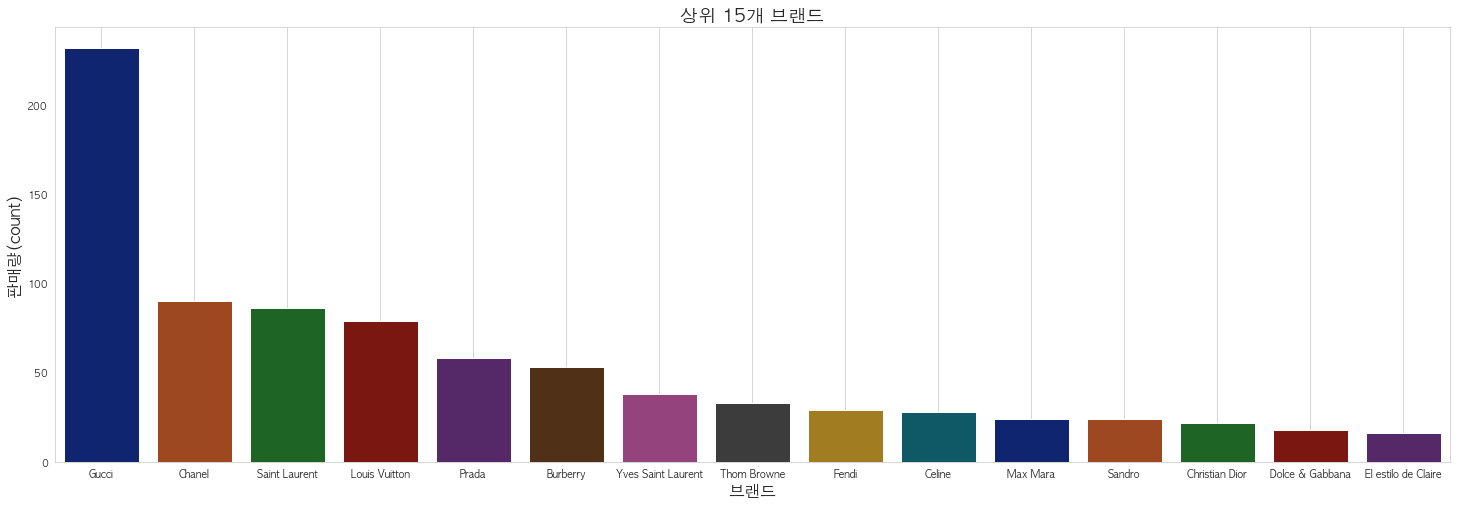

In [186]:
best_br = df.brandnm.value_counts().sort_values(ascending=False).head(15)
plt.figure(figsize=(25,8))
sns.barplot(best_br.index, best_br.values, palette='dark')
plt.grid()
plt.title('상위 15개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)
plt.show()

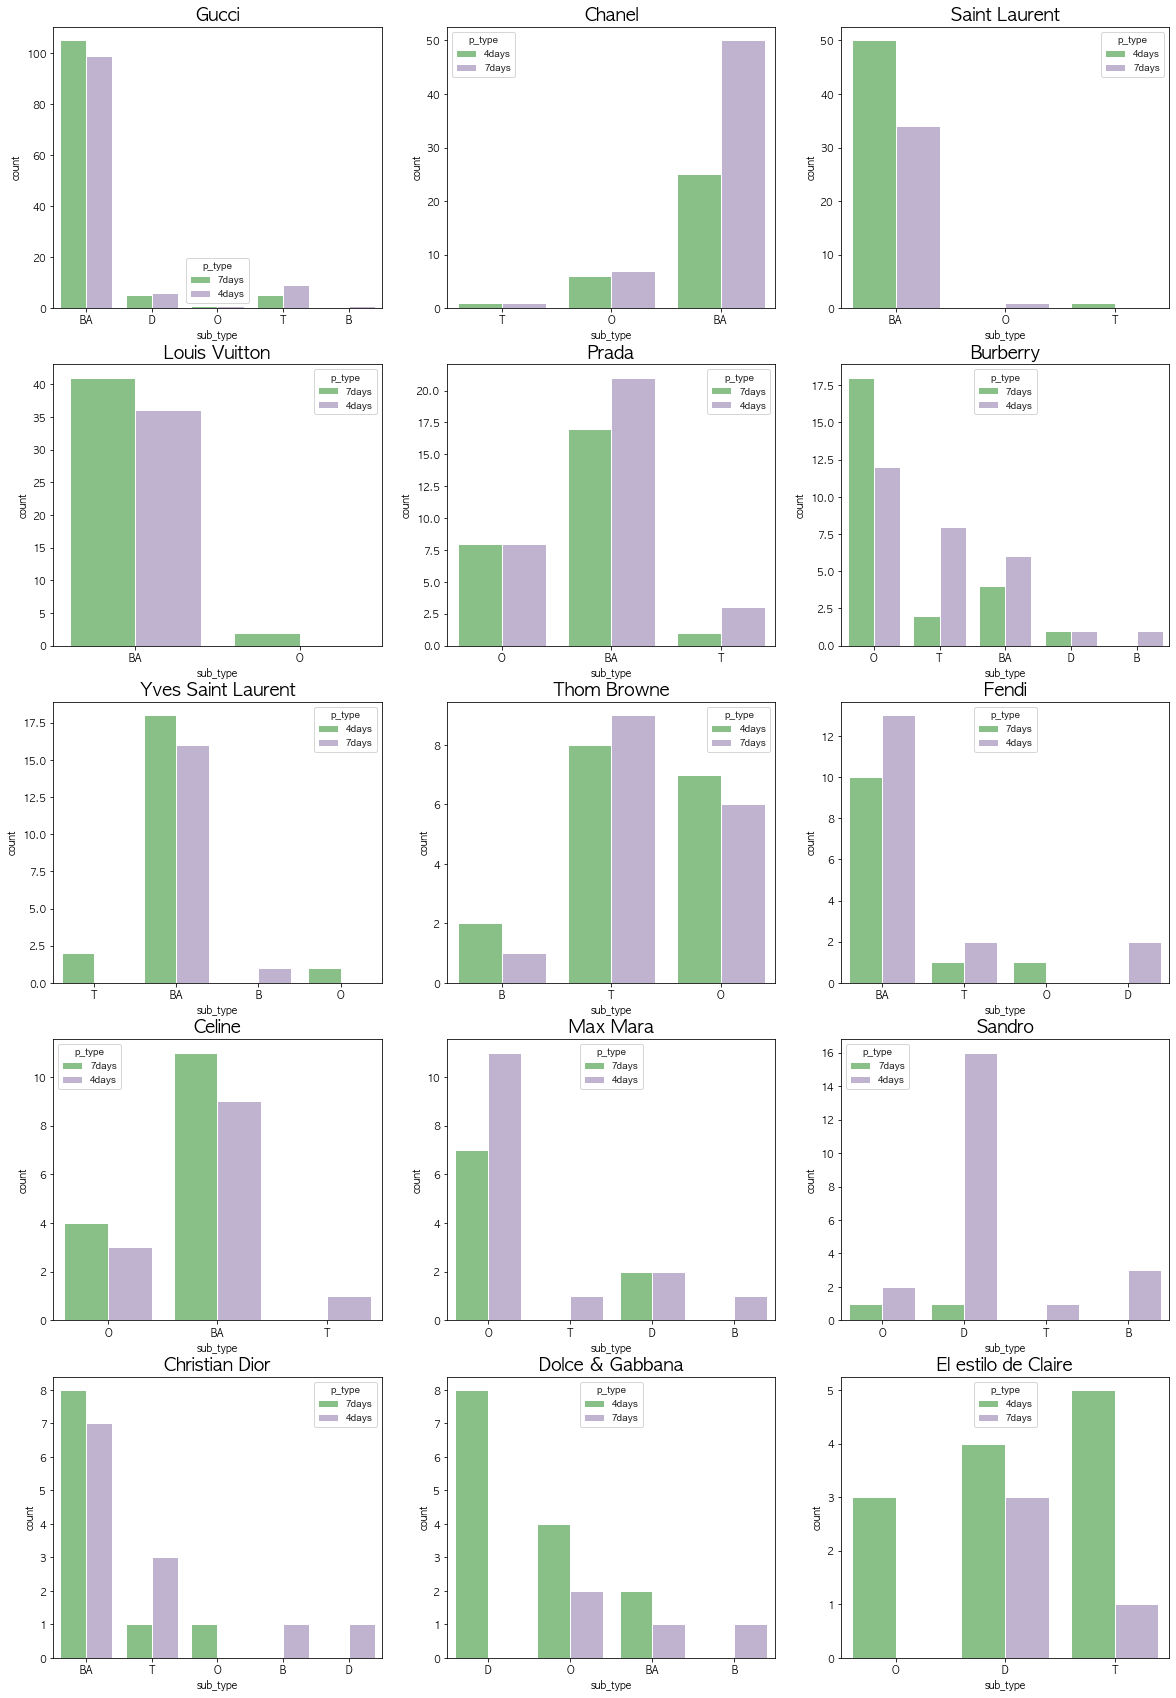

In [176]:
# 상위 15개 브랜드 sub_type 분포
# br = list(df.brandnm.value_counts().sort_values(ascending=False).head(30))
br = list(df.brandnm.value_counts().sort_values(ascending=False).head(15).index)

f, ax = plt.subplots(5,3 , figsize = (20,30))
axx = ax.flatten()


for axx2, j in zip(axx, br) :
    sns.set_style('whitegrid')
    plt.subplot(axx2)
    b_ca = df[df['brandnm'] == j]
    sns.countplot(data = b_ca, x= 'sub_type', hue='p_type', palette='Accent', ax= axx2)
    plt.title(j, fontsize = 18)

### - Gucci 데이터만 따로 보기

In [52]:
# gucci 데이터만 따로 보기
gucci = df.query('brandnm == "Gucci"')[:]
gucci

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,Y
34,Gucci,padlock GG canvas shoulder bag,a143862,2019-09-29,2021-01-14,4days,BA,Y
36,Gucci,flap cross bag black,a1141099,2021-01-04,2021-01-13,4days,BA,Y
...,...,...,...,...,...,...,...,...
1450,Gucci,super mini sylvie white,a1144433,2021-01-25,2021-03-02,7days,BA,Y
1452,Gucci,vintage web GG two way bag brown,a1117218,2020-08-30,2021-03-02,7days,BA,Y
1456,Gucci,sylvie mini chain ribbon bag red,a1147961,2021-03-01,2021-03-01,4days,BA,Y
1457,Gucci,microssima emily mini bag black,a1147942,2021-03-01,2021-03-01,7days,BA,Y


<AxesSubplot:>

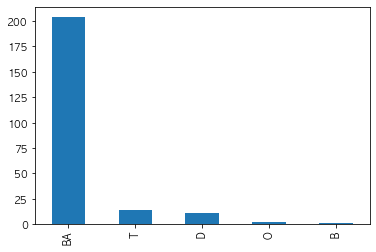

In [57]:
gucci.sub_type.value_counts().plot(kind='bar')

# BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TB – 투피스

In [62]:
gucci.USER.value_counts()
# 구찌 상품을 이용한 고객은 다 다르다.

a1133796    2
a1147417    1
a1138438    1
a1114447    1
a1147450    1
           ..
a1135235    1
a1149402    1
a1149124    1
a1148176    1
a1147337    1
Name: USER, Length: 231, dtype: int64

In [317]:
from IPython.display import Image
gucci.query('USER=="a1133796"')

# 비슷해 보이는 상품을 두개 빌렸음 
# Image("./구찌T1.png")
# Image("./구찌T2.png")

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
340,Gucci,mixed pattern knit top multi,a1133796,2020-11-28,2021-01-19,4days,T,Y
341,Gucci,basic pattern turtle neck sweater white,a1133796,2020-11-28,2021-01-19,4days,T,Y


In [61]:
gucci.app_yn.value_counts()

# 전체 232 rows 중에 207 명이 앱으로 유입

Y    208
Name: app_yn, dtype: int64

## 2) USER : 고객별

In [206]:
usr = list(df.USER.unique())
usr  # 고객명단

['a161237',
 'a1140859',
 'a1140740',
 'a110231',
 'a1139960',
 'a115159',
 'a1143028',
 'a117306',
 'a1140216',
 'a1141255',
 'a1137815',
 'a1135135',
 'a1129386',
 'a1143143',
 'a1142921',
 'a1142834',
 'a1141367',
 'a1138992',
 'a1143019',
 'a1142679',
 'a192991',
 'a1136028',
 'a1142924',
 'a1127813',
 'a1142841',
 'a143862',
 'a1141112',
 'a1141099',
 'a1142328',
 'a1139204',
 'a13934',
 'a1141580',
 'a1136116',
 'a1142554',
 'a1142736',
 'a164734',
 'a1140871',
 'a1128095',
 'a171604',
 'a189599',
 'a1129563',
 'a1141925',
 'a1141640',
 'a1120719',
 'a1133560',
 'a182915',
 'a1142471',
 'a1139255',
 'a1138513',
 'a1141520',
 'a1142263',
 'a189110',
 'a1138765',
 'a1141949',
 'a1140758',
 'a182494',
 'a147817',
 'a1141816',
 'a1129105',
 'a1131911',
 'a1141668',
 'a1139028',
 'a1133588',
 'a16928',
 'a1141468',
 'a1140737',
 'a1140842',
 'a1135222',
 'a1138599',
 'a1104471',
 'a1141530',
 'a1138438',
 'a1141394',
 'a1141207',
 'a1110250',
 'a1105400',
 'a199351',
 'a1141379',
 'a1

In [191]:
df.groupby('USER').count()

# 전체 행이 1471인데, 고객별로 묶으면, 1234행

,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn
USER,,,,,,,
a1100548,2,2,2,2,2,2,2
a1100887,1,1,1,1,1,1,1
a1101514,1,1,1,1,1,1,1
a1101645,1,1,1,1,1,1,0
a1102068,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
a198621,1,1,1,1,1,1,1
a19897,1,1,1,1,1,1,0
a199351,1,1,1,1,1,1,1


In [202]:
df.groupby('USER').count().sort_values(by='p_type', ascending=False)

,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn
USER,,,,,,,
a1149461,11,11,11,11,11,11,0
a1149583,10,10,10,10,10,10,0
a1142677,9,9,9,9,9,9,9
a1143701,7,7,7,7,7,7,7
a189404,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
a1145218,1,1,1,1,1,1,1
a1145217,1,1,1,1,1,1,1
a1145206,1,1,1,1,1,1,1


In [239]:
# 2회 이상 이용한 고객수는 얼마일까?

a = df.USER.value_counts()
print('2번 이상 이용한 고객', len(a[a.values > 1]))
print('3번 이상 이용한 고객', len(a[a.values > 2]))
print('4번 이상 이용한 고객', len(a[a.values > 3]))
print('5번 이상 이용한 고객', len(a[a.values > 4]))
print('10번 이상 이용한 고객', len(a[a.values > 9]))  # a1149461 와 a1149583

2번 이상 이용한 고객 139
3번 이상 이용한 고객 50
4번 이상 이용한 고객 17
5번 이상 이용한 고객 9
10번 이상 이용한 고객 2


In [193]:
# 10회 이상 구매한 고객 1 
df.query('USER=="a1149461"')
# 하루에 여러가지 옷을 렌트
# 촬영이나 상업적 이용이 있을지도 

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
1148,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,NaN
1149,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,NaN
1150,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,NaN
1151,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,NaN
1152,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,NaN
1153,roajeu,ruffle basic pattern mermaid trumpet-skirt green,a1149461,2021-03-15,2021-03-17,4days,B,NaN
1154,Alexander Wang,basic pattern skirt grey,a1149461,2021-03-15,2021-03-17,4days,B,NaN
1155,Christian Dior,basic pattern sweater burgundy,a1149461,2021-03-15,2021-03-17,4days,T,NaN
1156,MSGM,basic pattern top black,a1149461,2021-03-15,2021-03-17,4days,T,NaN
1157,Fayewoo,ruffle lace pattern mermaid trumpet-skirt red,a1149461,2021-03-15,2021-03-17,4days,B,NaN


In [238]:
# 10회 이상 구매한 고객 2 
df.query('USER=="a1149583"')
# 마찬가지로 하루에 여러 상품 렌트
# 앱 사용 x

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
1102,Theory,one button jacket gray,a1149583,2021-03-16,2021-03-19,4days,O,NaN
1103,Michaa,stitch detail midi skirt white,a1149583,2021-03-16,2021-03-19,4days,B,NaN
1104,Prada,daino shoulder bag skin,a1149583,2021-03-16,2021-03-19,4days,BA,NaN
1105,Ted Baker,pleats basic pattern blouse pink,a1149583,2021-03-16,2021-03-19,4days,T,NaN
1106,La maille sezane,frill dots pattern blouse nude,a1149583,2021-03-16,2021-03-19,4days,T,NaN
1107,Michaa,basic pattern A-Line knit-dress nude,a1149583,2021-03-16,2021-03-19,4days,D,NaN
1108,Jigott,button basic pattern blouse white,a1149583,2021-03-16,2021-03-19,4days,T,NaN
1109,It michaa,basic pattern H-Line dress white,a1149583,2021-03-16,2021-03-19,4days,D,NaN
1110,Mine,basic pattern skirt pink,a1149583,2021-03-16,2021-03-19,4days,B,NaN
1111,Mine,punching basic pattern skirt skyblue,a1149583,2021-03-16,2021-03-19,4days,B,NaN


In [265]:
a = df.USER.value_counts()
# 3회 이상 이용한 고객의 선호 브랜드

more3 = list(a[a.values > 2].index)
more3

more3_df = df[df.USER==more3[0]]

for i in range(1,len(more3)):
    more3_df = pd.concat([more3_df, df[df.USER==more3[i]]])
more3_df


more3_df.brandnm.value_counts(ascending=False).head(50)
more3_df.brandnm.value_counts(ascending=False).head(30)
# 3회 이상 이용한 고객의 선호 브랜드 30위중 구찌가 없음
# 그럼 구찌는 한번 빌리고 다시 안빌리는건가..?
# 그럼 구찌 한번 빌려보러고 이용한 1회성 고객이 그렇게 많다는 건가?

El estilo de Claire     6
Max Mara                6
Burberry                6
Saint Laurent           5
Christian Dior          5
Burberry London         5
Balmain                 4
Sandro                  4
Thom Browne             4
Michaa                  4
Vivienne Westwood       3
Cos                     3
Prada                   3
Mine                    3
Lucky Chouette          3
Balenciaga              3
BCBG Max Azria          2
Convexo Concave         2
Dior                    2
Since then              2
Givenchy                2
Maje                    2
Stylenanda              2
Michael Michael Kors    2
Jigott                  2
Debb                    2
Calvin Klein            2
It michaa               2
Dolce & Gabbana         2
Alexander Mcqueen       2
Time                    2
Versace                 2
Fendi                   2
Louis Vuitton           2
Danha                   2
Musinsa standard        2
& Other Stories         2
Imvely                  2
Gucci       

## 3) reg_date : 가입일자

In [279]:
import datetime as dt

# df.reg_date.dt.year.sort_values()
df.reg_date.dt.year.value_counts()

2021.0    981
2020.0    341
2019.0    111
2018.0     31
2017.0      2
Name: reg_date, dtype: int64

In [280]:
df.reg_date.dt.month.value_counts()

3.0     439
2.0     356
1.0     279
12.0    117
11.0     75
10.0     46
8.0      43
9.0      33
4.0      27
5.0      18
6.0      17
7.0      16
Name: reg_date, dtype: int64

In [301]:
df.order_date-df.reg_date

0      406 days
1       13 days
2       13 days
3       13 days
4       14 days
         ...   
1466   691 days
1467    18 days
1468     1 days
1469     1 days
1470   342 days
Length: 1471, dtype: timedelta64[ns]

In [310]:
len(df[df.USER=='a1140859'].order_date.unique())

1

In [314]:
# 모든 고객이 한번만 사용한다는 건가?
# 한번 렌트하고 만족도가 대단히 떨어진다는 건가
# 기간이 짧아서?
# 매 주문마다 다른 아이디 부여?

a = df.USER.value_counts()
more2 = list(a[a.values > 1].index)

for us in more2:
    if len(df[df.USER=='a1140859'].order_date.unique()) >1:
        print(us, df[df.USER==us].order_date.unique())
    else: pass

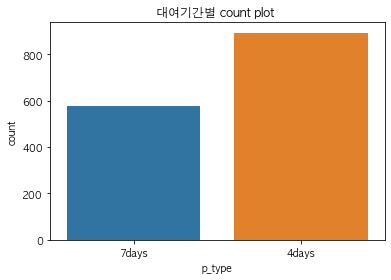

In [20]:
sns.countplot(data = df , x= "p_type" )
plt.title('대여기간별 count plot ')
plt.show()

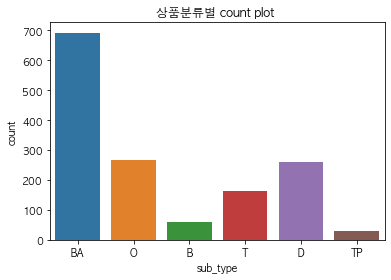

In [26]:
sns.countplot(data = df , x= "sub_type" )
plt.title('상품분류별 count plot ')
plt.show()

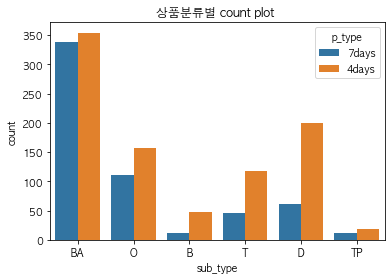

In [27]:
sns.countplot(data = df , x= "sub_type", hue='p_type')
plt.title('상품분류별 count plot ')
plt.show()